# 1. Libraries

In [488]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import calendar

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

# Import RFE
from sklearn.feature_selection import RFE

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [489]:
# Show all rows & columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 2. Importing Dataset

In [490]:
df1 = pd.read_csv("day.csv")

In [565]:
df1.shape

(730, 16)

# 3. Data Characteristics

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [491]:
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [492]:
df1.shape

(730, 16)

In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
 16  Wd          730 non-null  

# 4. Creating new features & Changing feature names

#### 4.1 Creating features

In [494]:
df2 = df1.copy()

# Converting object into datetime
df2['dteday'] = pd.to_datetime(df2.dteday)

# Creating new features
df2['Weekday_num'] = df2['dteday'].dt.dayofweek
df2['day_name'] = df2['dteday'].dt.day_name()
df2['weekday_yes'] = list(map(lambda x : 1 if x <= 5 else 0, df2['Weekday_num']))
df2.head()

# Created dictionary for features like season_type & month_type
season_type = {1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}

month_type = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}

weather_sit = {1:"Clear", 2:"Mist", 3:"Light Snow", 4:"Heavy Rain"}

# Mapping dictionary on dataframe respective feature
df2['season'] = df2['season'].map(season_type)

df2['mnth'] = df2['mnth'].map(month_type)

df2['weathersit'] = df2['weathersit'].map(weather_sit)

df2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Weekday_num,day_name,weekday_yes
0,1,2018-01-01,Spring,0,Jan,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0,Monday,1
1,2,2018-02-01,Spring,0,Jan,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,3,Thursday,1
2,3,2018-03-01,Spring,0,Jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,Thursday,1
3,4,2018-04-01,Spring,0,Jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,6,Sunday,0
4,5,2018-05-01,Spring,0,Jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,Tuesday,1


#### 4.2 Dropping unrequired variables

In [495]:
# As instant is just a numbering so need to remove it.
# cnt = casual + registered, So our target variable is cnt, so better to remove casual & registered demand variable
# As we already have month number & week of days, so we can drop dteday
# As we created correct Weekday_num, so dropping weekday
# As we created day_name, so dropping Weekday_num

df2 = df2.drop(["instant","dteday","weekday","Weekday_num", "casual", "registered"], axis = 1)

#### 4.3 Renameing the features

In [496]:
df2.rename({"yr":"year", "mnth":"month", "hum":"humidity", "day_name":"day", "weekday_yes":"weekday", "cnt" :"bikes_rented"}, axis = 1, inplace = True)

#### 4.4 Re-arrange the columns in order

In [497]:
df2 = df2[['season', 'year', 'month', 'day', 'weekday', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'bikes_rented']]

#### 4.5 Converting required variables

In [498]:
# Converting numerical variable to categorical variable of type = "object"
df2[['weekday','workingday']] = df2[['weekday','workingday']].astype('object')

In [499]:
df2.head()

,season,year,month,day,weekday,holiday,workingday,weathersit,temp,atemp,humidity,windspeed,bikes_rented
0,Spring,0,Jan,Monday,1,0,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,Thursday,1,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,Thursday,1,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,Sunday,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,Tuesday,1,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# 5. EDA & Checking Assumptions

#### 5.1 Checking NA's

In [500]:
df2.isnull().sum()
# Note: No NA's found

season          0
year            0
month           0
day             0
weekday         0
holiday         0
workingday      0
weathersit      0
temp            0
atemp           0
humidity        0
windspeed       0
bikes_rented    0
dtype: int64

In [501]:
# Checking variable different stats
df2.describe()

,year,holiday,temp,atemp,humidity,windspeed,bikes_rented
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [502]:
df2.head()

,season,year,month,day,weekday,holiday,workingday,weathersit,temp,atemp,humidity,windspeed,bikes_rented
0,Spring,0,Jan,Monday,1,0,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,Thursday,1,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,Thursday,1,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,Sunday,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,Tuesday,1,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### 5.2 Creating Scatter plots on continues variables

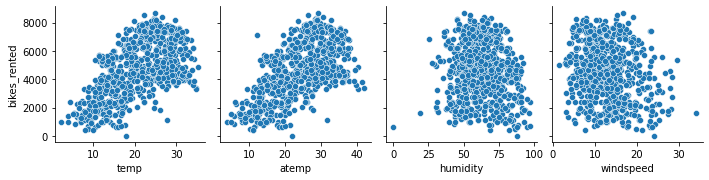

In [503]:
sns.pairplot(data = df2, x_vars = ['temp', 'atemp', 'humidity','windspeed'], y_vars = 'bikes_rented')
plt.show()
# Looks like temp & atemp have positive correlation
# humidity & windspeed need to check, so we plot regplot()

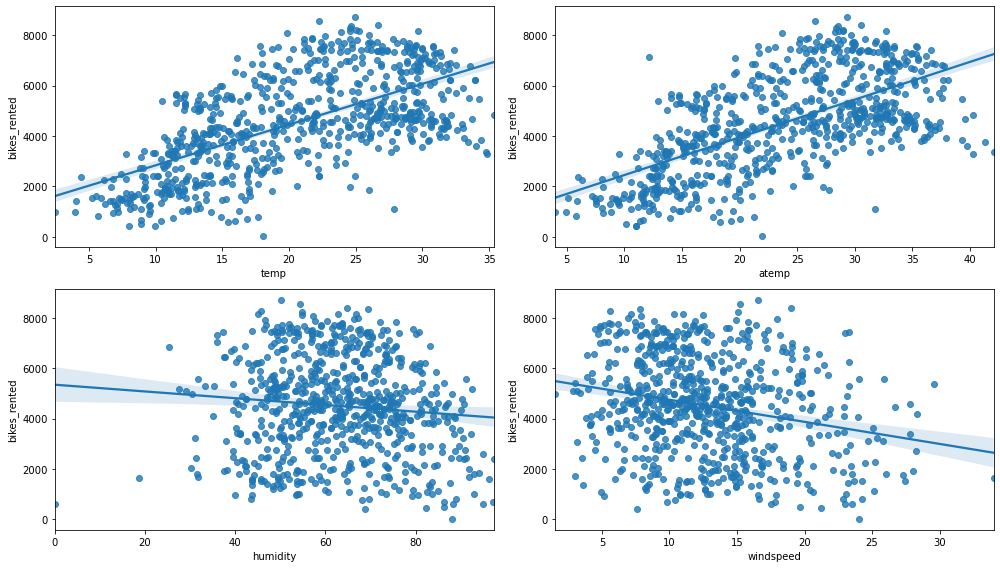

In [504]:
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
sns.regplot(x = 'temp', y = 'bikes_rented', data = df2)

plt.subplot(2,2,2)
sns.regplot(x = 'atemp', y = 'bikes_rented', data = df2)

plt.subplot(2,2,3)
sns.regplot(x = 'humidity', y = 'bikes_rented', data = df2)

plt.subplot(2,2,4)
sns.regplot(x = 'windspeed', y = 'bikes_rented', data = df2)

plt.tight_layout()

plt.show()

# Conclusion:
# 1. 'temp' Show positive correlation
# 2. 'atemp' Show positive correlation
# 3. 'humidity' Show negative correlation
# 4. 'windspeed' Show positive correlation

#### 5.3 Creating Bar plots on categorical variables

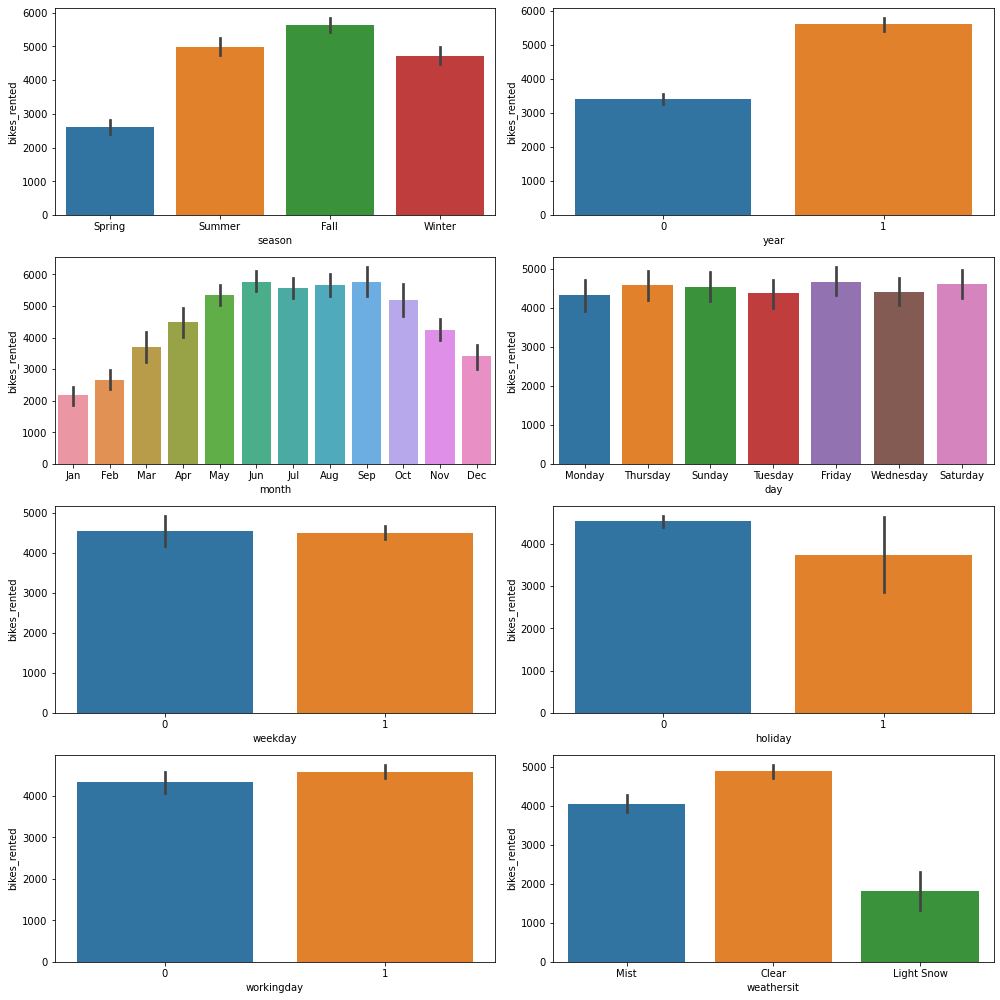

In [505]:
plt.figure(figsize=(14,14))

plt.subplot(4,2,1)
sns.barplot(x = 'season', y = 'bikes_rented', data = df2)
# Show positive correlation

plt.subplot(4,2,2)
sns.barplot(x = 'year', y = 'bikes_rented', data = df2)
# Show positive correlation

plt.subplot(4,2,3)
sns.barplot(x = 'month', y = 'bikes_rented', data = df2)
# Show negative correlation

plt.subplot(4,2,4)
sns.barplot(x = 'day', y = 'bikes_rented', data = df2)
# Show negative correlation

plt.subplot(4,2,5)
sns.barplot(x = 'weekday', y = 'bikes_rented', data = df2)
# Show positive correlation

plt.subplot(4,2,6)
sns.barplot(x = 'holiday', y = 'bikes_rented', data = df2)
# Show positive correlation

plt.subplot(4,2,7)
sns.barplot(x = 'workingday', y = 'bikes_rented', data = df2)
# Show negative correlation

plt.subplot(4,2,8)
sns.barplot(x = 'weathersit', y = 'bikes_rented', data = df2)
# Show negative correlation
plt.tight_layout()

plt.show()

# Concluion:
# 1. Season, year, month, holiday, weathersit showing some changes or relationship
# 2. day, weekday, workingday showing no change/very low change, so we can drop.

#### 5.4 Checking distribution of Traget Variable

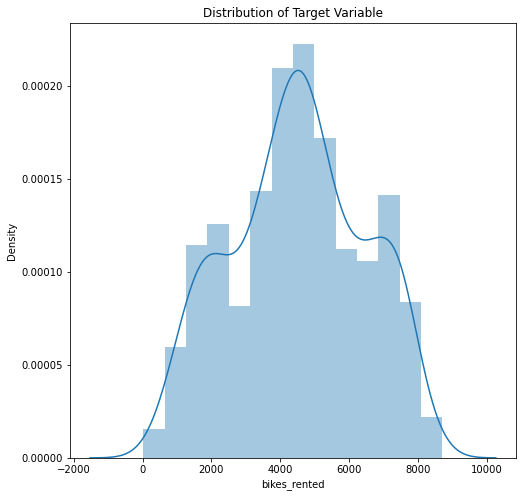

In [506]:
plt.figure(figsize=(8,8))
sns.distplot(df2.bikes_rented)
plt.title('Distribution of Target Variable')
plt.show()

#### 5.5 Checking correlation between continues variables

In [507]:
df2.corr()

,year,holiday,temp,atemp,humidity,windspeed,bikes_rented
year,1.000000,0.008195,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
temp,0.048789,-0.028764,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,-0.112547,-0.015662,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
bikes_rented,0.569728,-0.068764,0.627044,0.630685,-0.098543,-0.235132,1.000000


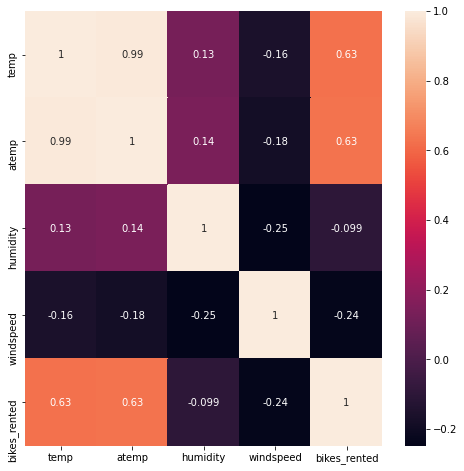

In [508]:
plt.figure(figsize=(8,8))
sns.heatmap(df2[['temp','atemp','humidity','windspeed','bikes_rented']].corr(), annot= True)
plt.show()

# Conclusion: As we can see high correlation between temp & atemp so we drop atemp
# Also showing temp is positively corelated with bikes_rented & humidity & windspeed is negatively corelated

#### 5.6 Droping variable as per EDA outcome

In [509]:
# Droping numerical variable 'atemp'
# Droping categorical variable 'day', 'weekday', 'workingday'.

df3 = df2.copy()

df3.drop(['atemp', 'day', 'weekday','workingday'], axis = 1, inplace = True)

#### 5.7 Performing dummy encoding

In [510]:
# Performing dummy encoding on categorical variables

df4 = pd.get_dummies(df3, columns = ['season','month','weathersit'], prefix = '', prefix_sep = '', drop_first=True)

In [511]:
df4.head()

,year,holiday,temp,humidity,windspeed,bikes_rented,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow,Mist
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


# Linear Regression

### 1. Linear Regression Type 1: based on EDA finding

#### Data for OLS model

In [512]:
df_sm = df4.copy()
df_sm.shape

(730, 22)

#### 1.1 Spliting dependent & Target variable


In [513]:
X = df_sm.loc[:,df_sm.columns != 'bikes_rented']
y = df_sm.loc[:,df_sm.columns == 'bikes_rented']

print(X.shape)
print(y.shape)

(730, 21)
(730, 1)


#### 1.2 Test train split

In [514]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .7, random_state= 123)

#### 1.3 Training model & adding constant

In [515]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,year,holiday,temp,humidity,windspeed,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow,Mist
406,1.0,1,0,9.190847,73.1250,19.416332,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
299,1.0,0,0,19.270000,81.2917,13.250121,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
142,1.0,0,0,25.898347,81.0000,15.667414,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
275,1.0,0,0,15.750847,76.0833,5.584169,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
367,1.0,1,0,6.150000,44.1250,24.499957,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


#### 1.4 Traing & Fitting the model

In [516]:
lr_sm = sm.OLS(y_train, X_train_sm)
lr_sm_model = lr_sm.fit()
lr_sm_model.params

const         2874.988062
year          1981.650446
holiday       -553.743483
temp           121.301456
humidity       -15.077770
windspeed      -46.539742
Spring        -848.830297
Summer         116.322363
Winter         923.275271
Aug            -80.628103
Dec           -606.693081
Feb           -141.513823
Jan           -303.709589
Jul           -392.810122
Jun             35.398375
Mar            254.578066
May            156.950890
Nov           -680.722239
Oct            -93.512194
Sep            520.072537
Light Snow   -1683.999035
Mist          -365.867270
dtype: float64

In [517]:
lr_sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           bikes_rented   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          3.90e-187
Time:                        15:21:44   Log-Likelihood:                -4113.9
No. Observations:                 510   AIC:                             8272.
Df Residuals:                     488   BIC:                             8365.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2874.9881    420.054      6.844      0.000    2049.651    3700.325
year        1981.6504     72.101     27.484      0.000    1839.984    2123.317
holiday     -553.7435    187.683     -2.950      0.003    -922.510    -184.977
temp         121.3015     12.271      9.885      0.000      97.190     145.413
humidity     -15.0778      3.570     -4.224      0.000     -22.091      -8.064
windspeed    -46.5397      7.651     -6.083      0.000     -61.573     -31.506
Spring      -848.8303    265.349     -3.199      0.001   -1370.198    -327.463
Summer       116.3224    233.466      0.498      0.619    -342.400     575.045
Winter       923.2753    245.664      3.758      0.000     440.585    1405.965
Aug          -80.6281    297.971     -0.271      0.787    -666.093     504.836
Dec         -606.6931    294.890     -2.057      0.040   -1186.103     -27.283
Feb         -141.5138    291.241     -0.486      0.627    -713.754     430.727
Jan         -303.7096    299.534     -1.014      0.311    -892.245     284.826
Jul         -392.8101    305.969     -1.284      0.200    -993.990     208.369
Jun           35.3984    219.534      0.161      0.872    -395.951     466.747
Mar          254.5781    225.663      1.128      0.260    -188.813     697.969
May          156.9509    175.814      0.893      0.372    -188.496     502.397
Nov         -680.7222    326.489     -2.085      0.038   -1322.220     -39.224
Oct          -93.5122    314.240     -0.298      0.766    -710.942     523.918
Sep          520.0725    280.241      1.856      0.064     -30.556    1070.701
Light Snow -1683.9990    229.770     -7.329      0.000   -2135.460   -1232.538
Mist        -365.8673     94.027     -3.891      0.000    -550.615    -181.120
==============================================================================
Omnibus:                       81.319   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.709
Skew:                          -0.831   Prob(JB):                     2.35e-42
Kurtosis:                       5.502   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 1.5 Removing highest P-Value feature & re-train model

In [518]:
# By considering level of significance of 5% removing values based on P-Value


# First iteration removing Feb as P-value is very high
#df_sm1 = df_sm.loc[:, df_sm.columns != 'Feb']

# Second iteration removing Oct as P-value is very high 
#df_sm1 = df_sm.loc[:, df_sm.columns.difference(['Feb','Oct'])]

# Third iteration removing Aug as P-value is very high 
#df_sm1 = df_sm.loc[:, df_sm.columns.difference(['Feb','Oct','Aug'])]

# Fourth iteration removing Jun as P-value is very high 
#df_sm1 = df_sm.loc[:, df_sm.columns.difference(['Feb','Oct','Aug','Jun'])]

# Fifth iteration removing Jan as P-value is very high 
#df_sm1 = df_sm.loc[:, df_sm.columns.difference(['Feb','Oct','Aug','Jun','Jan'])]

# sixth iteration removing Summer as P-value is very high 
#df_sm1 = df_sm.loc[:, df_sm.columns.difference(['Feb','Oct','Aug','Jun','Jan','Summer'])]

# seventh iteration removing May as P-value is very high 
df_sm1 = df_sm.loc[:, df_sm.columns.difference(['Feb','Oct','Aug','Jun','Jan','Summer','May'])]

df_sm1.head()

,Dec,Jul,Light Snow,Mar,Mist,Nov,Sep,Spring,Winter,bikes_rented,holiday,humidity,temp,windspeed,year
0,0,0,0,0,1,0,0,1,0,985,0,80.5833,14.110847,10.749882,0
1,0,0,0,0,1,0,0,1,0,801,0,69.6087,14.902598,16.652113,0
2,0,0,0,0,0,0,0,1,0,1349,0,43.7273,8.050924,16.636703,0
3,0,0,0,0,0,0,0,1,0,1562,0,59.0435,8.200000,10.739832,0
4,0,0,0,0,0,0,0,1,0,1600,0,43.6957,9.305237,12.522300,0


#### 1.5.1 Performing model fitting operation again

In [519]:
# Spliting data
X = df_sm1.loc[:,df_sm1.columns != 'bikes_rented']
y = df_sm1.loc[:,df_sm1.columns == 'bikes_rented']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .7, random_state= 123)

# Adding constant
X_train_sm = sm.add_constant(X_train)

# Training & fitting model
lr_sm = sm.OLS(y_train, X_train_sm)
lr_sm_model_1 = lr_sm.fit()

lr_sm_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           bikes_rented   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     200.3
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.75e-193
Time:                        15:21:48   Log-Likelihood:                -4117.4
No. Observations:                 510   AIC:                             8265.
Df Residuals:                     495   BIC:                             8328.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2882.6168    303.394      9.501      0.000    2286.518    3478.716
Dec         -478.0302    140.089     -3.412      0.001    -753.272    -202.788
Jul         -487.4907    148.891     -3.274      0.001    -780.027    -194.955
Light Snow -1717.8872    227.687     -7.545      0.000   -2165.239   -1270.536
Mar          395.0551    130.391      3.030      0.003     138.868     651.242
Mist        -376.9850     93.430     -4.035      0.000    -560.554    -193.416
Nov         -587.4089    171.682     -3.421      0.001    -924.725    -250.093
Sep          473.6531    143.274      3.306      0.001     192.153     755.154
Spring     -1129.7113    130.481     -8.658      0.000   -1386.076    -873.347
Winter       744.1739    122.907      6.055      0.000     502.691     985.657
holiday     -546.8348    185.697     -2.945      0.003    -911.686    -181.984
humidity     -14.3029      3.417     -4.186      0.000     -21.017      -7.589
temp         121.8814      8.465     14.399      0.000     105.250     138.513
windspeed    -44.9355      7.513     -5.981      0.000     -59.697     -30.174
year        1994.3472     71.440     27.916      0.000    1853.984    2134.711
==============================================================================
Omnibus:                       77.929   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.704
Skew:                          -0.812   Prob(JB):                     4.26e-39
Kurtosis:                       5.383   Cond. No.                         633.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- As now P-values for remaining all features are below 5%, we can consider it as a best fit model.
- Also adjusted R squared is also high 84.6%
- But, still we need to check on distribution of residuals & homoscedasticity

#### 1.6 Residual Analysis - Training data

In [521]:
y_train_pred_sm = lr_sm_model_1.predict(X_train_sm)

<Figure size 576x576 with 0 Axes>

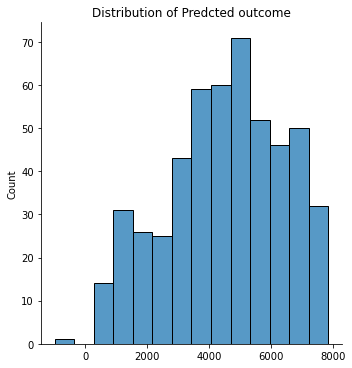

In [525]:
plt.figure(figsize=(8,8))
sns.displot(y_train_pred_sm)
plt.title('Distribution of Predcted outcome')
plt.show()

In [522]:
res_sm = y_train.bikes_rented - y_train_pred_sm

<Figure size 576x576 with 0 Axes>

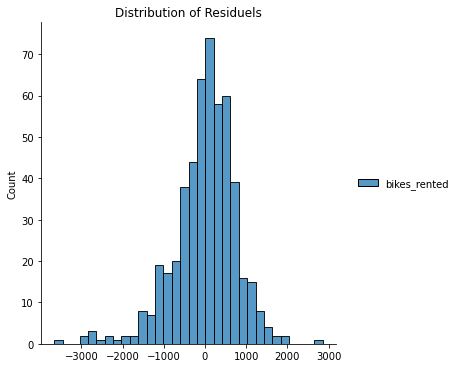

In [526]:
plt.figure(figsize=(8,8))
sns.displot(res)
plt.title('Distribution of Residuels')
plt.show()

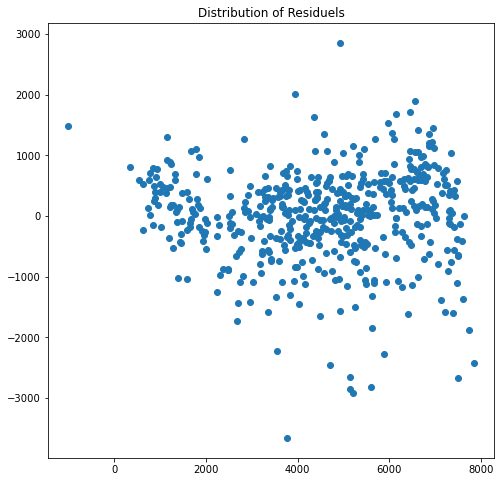

In [527]:
# look for patterns in residuals
plt.figure(figsize=(8,8))
plt.scatter(y_train_pred_sm, res)
plt.title('Distribution of Residuels')
plt.show()
# No sign of heteroscedasticity

#### 1.7 Prediction & Residual Analysis on test data

In [305]:
# prediction test set
X_test_sm = sm.add_constant(X_test)

y_test_pred_sm = lr_sm_model_1.predict(X_test_sm)

In [306]:
# r2 on test
r2_test = r2_score(y_true=y_test, y_pred = y_test_pred_sm)
print(r2)

0.8012460435399201


In [307]:
# r2 on train
r2_train = r2_score(y_true=y_train, y_pred = y_train_pred_sm)
print(r2)

0.8012460435399201


In [308]:
# Mean squered error
mean_squared_error(y_true=y_train, y_pred = y_train_pred_sm)

602455.0989930237

In [309]:
# Mean squered error
mean_squared_error(y_true=y_test, y_pred = y_test_pred_sm)

618555.830650227

In [312]:
# plt.scatter(X_test.bik, y_test)
# plt.plot(X_test, y_test_pred_sm, 'r')
# plt.show()

### 2. Linear Regression Type 2: based on sklearn

#### 2.1 Creating copy of dataframe

In [528]:
df_sk = df2.copy()

In [529]:
df_sk[['weekday','workingday']] = df_sk[['weekday','workingday']].astype('int')

In [530]:
df_sk.head()

,season,year,month,day,weekday,holiday,workingday,weathersit,temp,atemp,humidity,windspeed,bikes_rented
0,Spring,0,Jan,Monday,1,0,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,Thursday,1,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,Thursday,1,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,Sunday,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,Tuesday,1,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [531]:
df_sk = pd.get_dummies(df_sk, columns = ['season','month','day','weathersit'], prefix = '', prefix_sep = '', drop_first=True)

In [532]:
df_sk.head()

,year,weekday,holiday,workingday,temp,atemp,humidity,windspeed,bikes_rented,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### 2.2 Splitting data into test-train

In [533]:
X = df_sk.loc[:,df_sk.columns != 'bikes_rented']
y = df_sk.loc[:,df_sk.columns == 'bikes_rented']

print(X.shape, y.shape)

(730, 30) (730, 1)


In [534]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .7, random_state= 123)

#### 2.3 Calculating VIF

In [535]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,weekday,142.46
4,temp,67.47
5,atemp,57.14
24,Sunday,21.25
8,Spring,11.56
10,Winter,8.93
9,Summer,8.59
14,Jan,6.51
12,Dec,6.17
20,Oct,6.17


#### 2.4 Removing variable based on VIF criteria > 5

In [536]:
#  First Iteration removing weekday
# X = df_sk.loc[:,df_sk.columns.difference(['weekday','bikes_rented'])]
# y = df_sk.loc[:,df_sk.columns == 'bikes_rented']
# print(X.shape, y.shape)

#  Second Iteration removing temp
# X = df_sk.loc[:,df_sk.columns.difference(['temp','weekday','bikes_rented'])]
# y = df_sk.loc[:,df_sk.columns == 'bikes_rented']
#print(X.shape, y.shape)

# Third Iteration removing atemp
# X = df_sk.loc[:,df_sk.columns.difference(['temp','weekday','bikes_rented','atemp'])]
# y = df_sk.loc[:,df_sk.columns == 'bikes_rented']
# print(X.shape, y.shape)

# Fourth Iteration removing humidity
# X = df_sk.loc[:,df_sk.columns.difference(['temp','weekday','bikes_rented','atemp','humidity'])]
# y = df_sk.loc[:,df_sk.columns == 'bikes_rented']
# print(X.shape, y.shape)

# Fifth Iteration removing Spring
# X = df_sk.loc[:,df_sk.columns.difference(['temp','weekday','bikes_rented','atemp','humidity','Spring'])]
# y = df_sk.loc[:,df_sk.columns == 'bikes_rented']
# print(X.shape, y.shape)

# Sixth Iteration removing windspeed
# X = df_sk.loc[:,df_sk.columns.difference(['temp','weekday','bikes_rented','atemp','humidity','Spring','windspeed'])]
# y = df_sk.loc[:,df_sk.columns == 'bikes_rented']
# print(X.shape, y.shape)

# Seventh Iteration removing Winter
X = df_sk.loc[:,df_sk.columns.difference(['temp','weekday','bikes_rented','atemp','humidity','Spring','windspeed','Winter'])]
y = df_sk.loc[:,df_sk.columns == 'bikes_rented']
print(X.shape, y.shape)

# After removing seven features, low VIF of remaining all features are below 5

(730, 23) (730, 1)


In [537]:
# Creating test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .7, random_state= 123)

# Calculating VIF again
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,workingday,4.33
15,Summer,3.23
22,year,2.11
10,Monday,2.03
3,Jan,1.90
17,Thursday,1.85
8,May,1.85
1,Dec,1.84
12,Oct,1.82
2,Feb,1.80


#### 2.5 Initiating SKlearn linear model & model fitting

In [538]:
# Instantiate
lm = LinearRegression()
# Fit a line
lm.fit(X_train, y_train)

# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[[ 1416.25693312  -688.06874727 -1574.72331133 -1980.20184329
   1367.7030282   1301.35738106 -2388.21998879  -455.354956
    804.60471645  -630.47159053  -376.47344014    42.54736918
   1262.37951261   -76.75430886  1696.25270786   326.09656452
   -147.3281627   -155.57267053  -346.75169234  -243.45984408
   -509.09523944   121.60079025  2138.73190412]]
[3507.04039407]


#### 2.6 To check Summary fitting again OLS model

In [539]:
# Adding constant
X_train_sm = sm.add_constant(X_train)

# Training & fitting model
lr_sm = sm.OLS(y_train, X_train_sm)
lr_sm_model_1 = lr_sm.fit()

lr_sm_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           bikes_rented   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     80.48
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.93e-149
Time:                        15:25:49   Log-Likelihood:                -4200.6
No. Observations:                 510   AIC:                             8449.
Df Residuals:                     486   BIC:                             8551.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3507.0404    306.763     11.432      0.000    2904.294    4109.787
Aug         1416.2569    297.364      4.763      0.000     831.980    2000.534
Dec         -688.0687    292.680     -2.351      0.019   -1263.142    -112.995
Feb        -1574.7233    296.463     -5.312      0.000   -2157.232    -992.215
Jan        -1980.2018    291.063     -6.803      0.000   -2552.098   -1408.306
Jul         1367.7030    298.671      4.579      0.000     780.856    1954.550
Jun         1301.3574    226.318      5.750      0.000     856.675    1746.040
Light Snow -2388.2200    238.562    -10.011      0.000   -2856.960   -1919.480
Mar         -455.3550    245.389     -1.856      0.064    -937.509      26.799
May          804.6047    195.073      4.125      0.000     421.314    1187.895
Mist        -630.4716     92.973     -6.781      0.000    -813.150    -447.794
Monday      -376.4734    167.639     -2.246      0.025    -705.860     -47.087
Nov           42.5474    304.041      0.140      0.889    -554.849     639.944
Oct         1262.3795    296.991      4.251      0.000     678.834    1845.925
Saturday     -76.7543    154.794     -0.496      0.620    -380.902     227.394
Sep         1696.2527    303.116      5.596      0.000    1100.672    2291.833
Summer       326.0966    217.394      1.500      0.134    -101.052     753.245
Sunday      -147.3282    160.066     -0.920      0.358    -461.835     167.179
Thursday    -155.5727    150.163     -1.036      0.301    -450.621     139.476
Tuesday     -346.7517    157.444     -2.202      0.028    -656.107     -37.396
Wednesday   -243.4598    157.371     -1.547      0.123    -552.671      65.751
holiday     -509.0952    243.462     -2.091      0.037    -987.464     -30.727
workingday   121.6008    111.415      1.091      0.276     -97.313     340.515
year        2138.7319     83.977     25.468      0.000    1973.728    2303.735
==============================================================================
Omnibus:                       73.251   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.655
Skew:                          -0.729   Prob(JB):                     4.85e-41
Kurtosis:                       5.571   Cond. No.                         30.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2.7 Residual Analysis on training set

In [540]:
y_train_pred_sm = lr_sm_model_1.predict(X_train_sm)

<Figure size 576x576 with 0 Axes>

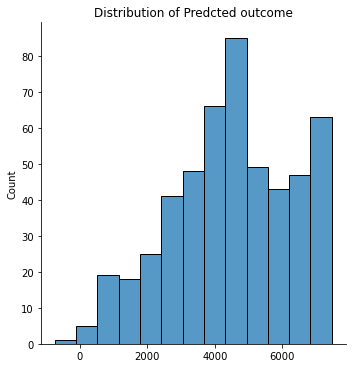

In [541]:
plt.figure(figsize=(8,8))
sns.displot(y_train_pred_sm)
plt.title('Distribution of Predcted outcome')
plt.show()

In [542]:
res_sm = y_train.bikes_rented - y_train_pred_sm

<Figure size 576x576 with 0 Axes>

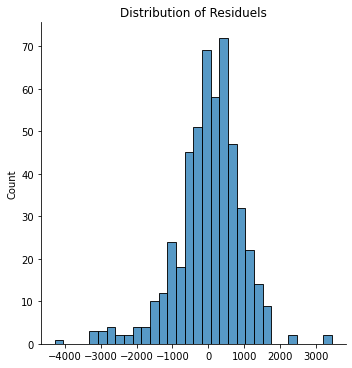

In [543]:
# plot the residuls
plt.figure(figsize=(8,8))
sns.displot(res_sm)
plt.title('Distribution of Residuels')
plt.show()

<Figure size 432x288 with 0 Axes>

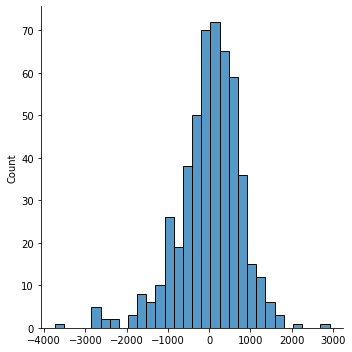

In [395]:
plt.figure()
sns.displot(res)
plt.show()

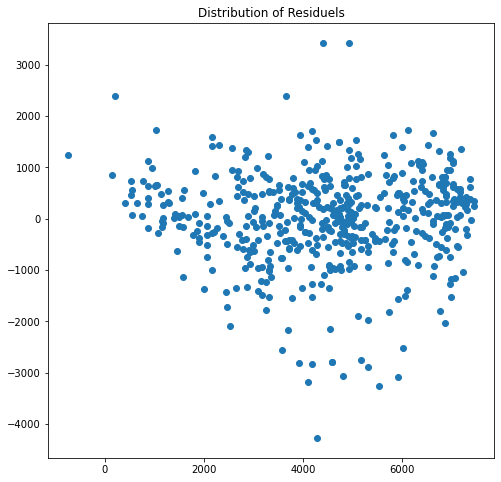

In [545]:
# look for patterns in residuals
plt.figure(figsize=(8,8))
plt.scatter(y_train_pred_sm, res_sm)
plt.title('Distribution of Residuels')
plt.show()
# No sign of heteroscedasticity

#### 2.8 Prediction & Residual Analysis on test data

In [546]:
# prediction test set
y_test_pred = lm.predict(X_test)

#### 2.9 Test Metrices for model validation

In [547]:
# r2 on test
r2_test = r2_score(y_true=y_test, y_pred = y_test_pred)
print("R Squred on Test data:",r2_test)

# Mean squered error
mean_error = mean_squared_error(y_true=y_test, y_pred = y_test_pred)
print("Mean squared error on test data:", mean_error)

R Squred on Test data: 0.7634030688818887
Mean squared error on test data: 736329.5496784349


### 2. Linear Regression Type 3: based on RFE

#### 2.1 Copy dataset

In [548]:
df_rfe = df2.copy()

#### 2.2 Type Conversion

In [549]:
df_rfe[['weekday','workingday']] = df_rfe[['weekday','workingday']].astype('int')

#### 2.3 Dummy Encoding

In [550]:
df_rfe = pd.get_dummies(df_rfe, columns = ['season','month','day','weathersit'], prefix = '', prefix_sep = '', drop_first=True)

#### 2.4 Target & Indepenedent Variable split

In [551]:
X = df_rfe.loc[:,df_rfe.columns != 'bikes_rented']
y = df_rfe.loc[:,df_rfe.columns == 'bikes_rented']

print(X.shape, y.shape)

(730, 30) (730, 1)


#### 2.5 Train Test Split

In [552]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .7, random_state= 123)

#### 2.6 Model fitting based on feature

In [553]:
# First Iteration: RFE with 30 features
lm = LinearRegression()
rfe1 = RFE(lm, 30)
#AIC = 8219, Adjusted R-squred=84.6%

# Second Iteration: RFE with 25 features
# lm = LinearRegression()
# rfe1 = RFE(lm, 25)
#AIC = 8290, Adjusted R-squred=84.1%

# Third Iteration: RFE with 20 features
# lm = LinearRegression()
# rfe1 = RFE(lm, 20)
#AIC = 8413, Adjusted R-squred=79.6%

# Fourth Iteration: RFE with 15 features
# lm = LinearRegression()
# rfe1 = RFE(lm, 15)
#AIC = 8413, Adjusted R-squred=79.6%

# Fifth Iteration: RFE with 10 features
# lm = LinearRegression()
# rfe1 = RFE(lm, 10)
#AIC = 8470, Adjusted R-squred=76.4%

# Fit with as per above setting
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)
print(rfe1.ranking_)

# Note: with all 30 feature is best case senerio

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [554]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,year,weekday,holiday,workingday,temp,atemp,humidity,windspeed,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
406,1.0,1,1,0,0,9.190847,10.54335,73.1250,19.416332,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
299,1.0,0,1,0,1,19.270000,22.85230,81.2917,13.250121,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
142,1.0,0,1,0,1,25.898347,29.51480,81.0000,15.667414,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
275,1.0,0,1,0,1,15.750847,19.60230,76.0833,5.584169,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
367,1.0,1,1,0,1,6.150000,6.31375,44.1250,24.499957,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [555]:
# Fitting the model
lm_rfe = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:           bikes_rented   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     97.11
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.58e-180
Time:                        15:27:16   Log-Likelihood:                -4109.7
No. Observations:                 510   AIC:                             8279.
Df Residuals:                     480   BIC:                             8407.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1912.6530    292.574      6.537      0.0

#### 2.7 Residual Analysis on training set

In [556]:
y_train_pred = rfe1.predict(X_train)

<Figure size 576x576 with 0 Axes>

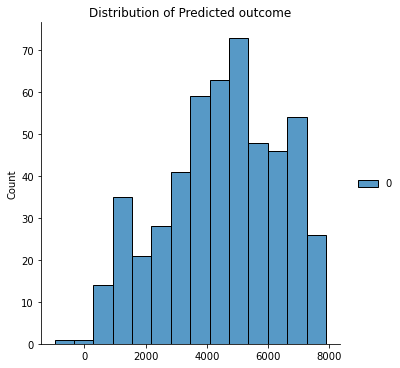

In [558]:
plt.figure(figsize=(8,8))
sns.displot(y_train_pred)
plt.title('Distribution of Predicted outcome')
plt.show()

In [560]:
res = y_train - y_train_pred

<Figure size 576x576 with 0 Axes>

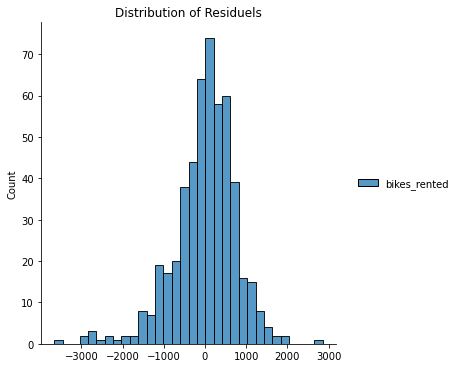

In [561]:
plt.figure(figsize=(8,8))
sns.displot(res)
plt.title('Distribution of Residuels')
plt.show()

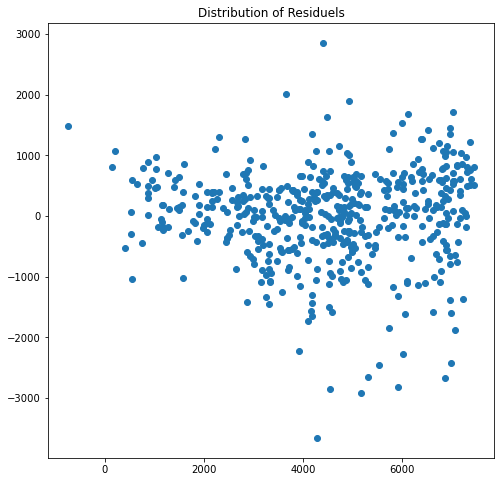

In [562]:
# look for patterns in residuals
plt.figure(figsize=(8,8))
plt.scatter(y_train_pred_sm, res)
plt.title('Distribution of Residuels')
plt.show()
# No sign of heteroscedasticity

#### 2.8 Prediction & Residual Analysis on test data

In [563]:
# prediction test set
y_test_pred = rfe1.predict(X_test)

#### 2.9 Test Metrices for model validation

In [564]:
# r2 on test
r2_test = r2_score(y_true=y_test, y_pred = y_test_pred)
print("R Squred on Test data:",r2_test)

# Mean squered error
mean_error = mean_squared_error(y_true=y_test, y_pred = y_test_pred)
print("Mean squared error on test data:", mean_error)

R Squred on Test data: 0.8081840948552305
Mean squared error on test data: 596963.4449142596


# Final Conclusion

- Linear model 1 (Based on EDA)
        - AIC:	8265
        - Adj. R-squared:	0.84.6
        - Prob (F-statistic):		1.75e-193

- Linear Model 2 (After removing variables having VIF > 5)
        - AIC:	8449.
        - Adj. R-squared:	0..782
        - Prob (F-statistic):		1.93e-149

- Linear model 3 (After setting on RFE, but works well on all 31 features as we droping feature AIC getting increase & Adjusterd R decresed)
        - AIC:	8279
        - Adj. R-squared:	0.846
        - Prob (F-statistic):		1.58e-180
        

#### Conclusion:
Best model among all above three is, Linear model(Based on EDA), as it has less number of feature, no multi-collinearity, Lesser AIC compared to others & highers Adjusted R Squared & Lesser RSME